In [140]:
import pandas as pd
import datetime as dt
import calendar 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('Uber Drives - .csv')
df

In [35]:
df=df.dropna()
df.isnull().sum()


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [59]:
df['START_DATE*']=pd.to_datetime(df['START_DATE*'], format='%m/%d/%Y %H:%M')
df['END_DATE*']=pd.to_datetime(df['END_DATE*'], format='%m/%d/%Y %H:%M')
df['CATEGORY*']=df['CATEGORY*'].astype('string')
df['START*']=df['START*'].astype('string')
df['STOP*']=df['STOP*'].astype('string')
df['PURPOSE*']=df['PURPOSE*'].astype('string')
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              string
START*                 string
STOP*                  string
MILES*                float64
PURPOSE*               string
dtype: object

In [106]:
df['year']=pd.DatetimeIndex(df['START_DATE*']).year
df['month']=pd.DatetimeIndex(df['START_DATE*']).month
df['day']=pd.DatetimeIndex(df['START_DATE*']).day
df['weekday']=df['START_DATE*'].dt.day_name()
df['dayofweek']=pd.DatetimeIndex(df['START_DATE*']).dayofweek+1
df['HOUR']=pd.DatetimeIndex(df['START_DATE*']).hour


In [115]:
##categories we have 
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: Int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

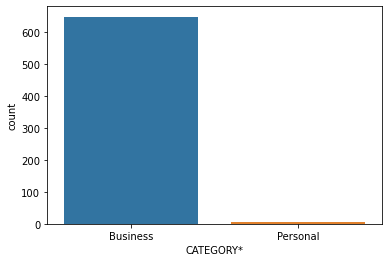

In [113]:
sns.countplot(x='CATEGORY*',data=df)


<AxesSubplot:ylabel='Frequency'>

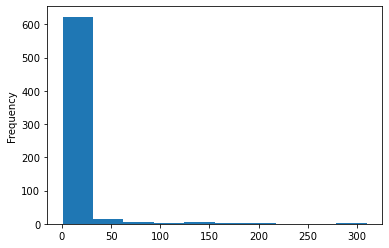

In [122]:
#how long do peaple travel with uber
df['MILES*'].plot.hist()

Text(0.5, 1.0, 'Number of trips vs Hours')

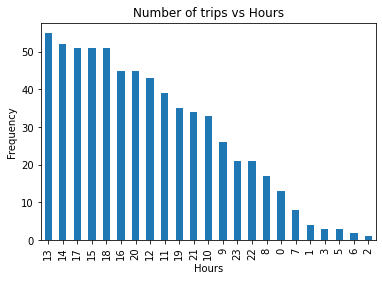

In [141]:
## what hour do most peaple take uber to their destination
df['HOUR'].value_counts().plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips vs Hours')

<AxesSubplot:>

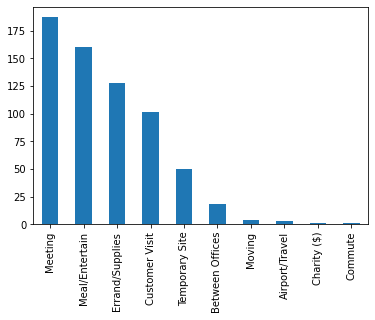

In [147]:
#purpos of trips
df['PURPOSE*'].value_counts().plot(kind='bar')

<AxesSubplot:>

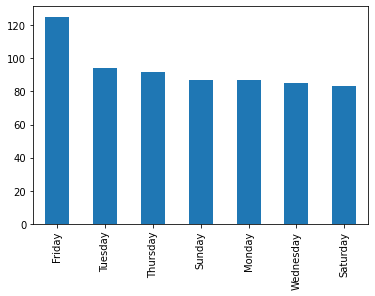

In [150]:
#wich day has the highest number of trips
df['weekday'].value_counts().plot(kind='bar')

<AxesSubplot:>

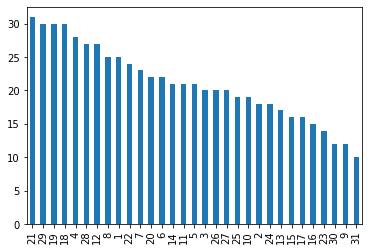

In [158]:
#what are the number of trips per each day
df['day'].value_counts().plot(kind='bar')

<AxesSubplot:>

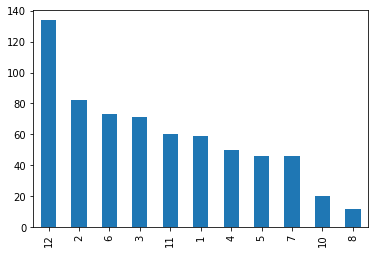

In [160]:
#what are the number of trips per each month
df['month'].value_counts().plot(kind='bar')

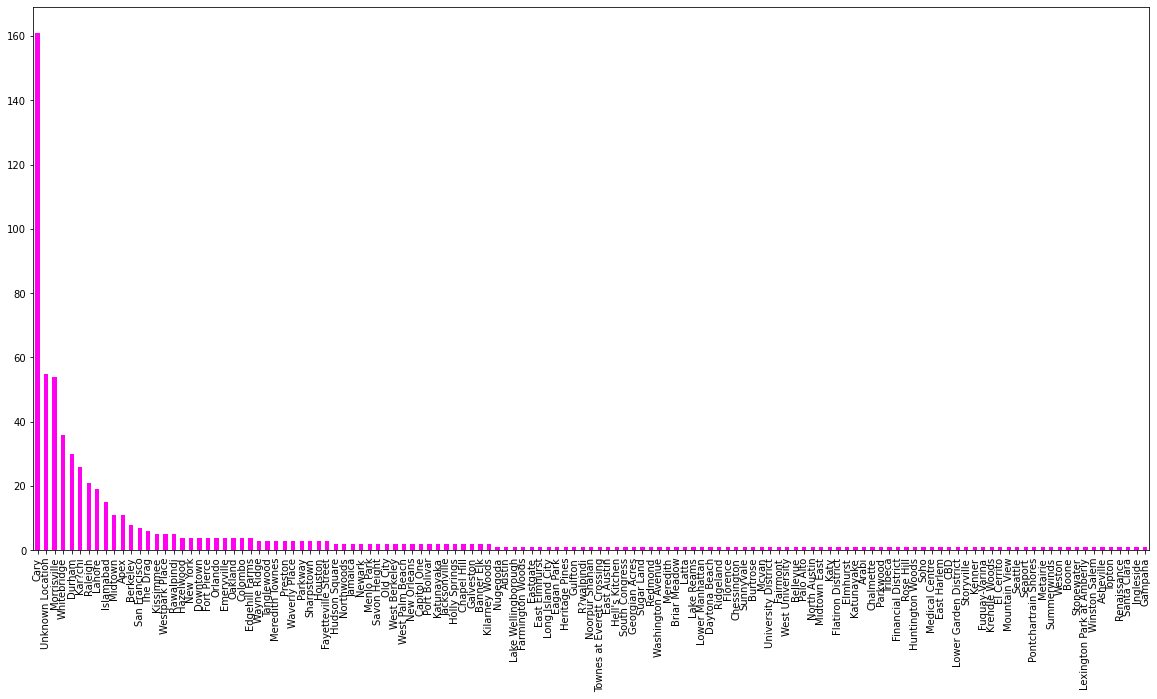

In [188]:
t=df['START*'].value_counts().plot(kind='bar', figsize=(20,10),color=[1, 0, 0.9410])


Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Topton                1
Renaissance           1
Santa Clara           1
Ingleside             1
Gampaha               1
Name: START*, Length: 131, dtype: Int64